# Epilepsy EEG Analysis

## 1. Reading EDF Data

In [1]:
#pip install pyedflib

import pyedflib
import numpy as np

#downloaded from https://physionet.org/pn6/chbmit/chb01/

f = pyedflib.EdfReader("../../chb01_01.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

## 2. Plotting First 5 Channels
### Non-Seizure Episode

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

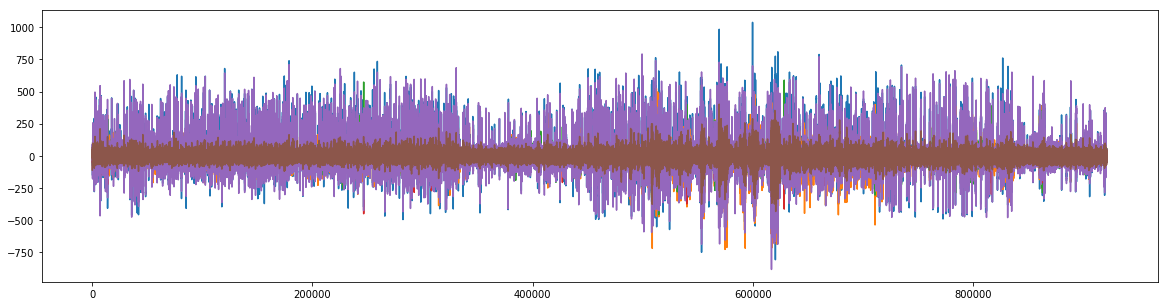

In [3]:
plt.figure(figsize=(20,5))

#X dimension is the ECG channel

plt.plot(sigbufs[0])
plt.plot(sigbufs[1])
plt.plot(sigbufs[2])
plt.plot(sigbufs[3])
plt.plot(sigbufs[4])
plt.plot(sigbufs[5])

## 3. Seizure Episode

In [2]:
#downloaded from https://physionet.org/pn6/chbmit/chb01/

'''File Name: chb01_04.edf
File Start Time: 14:43:12
File End Time: 15:43:12
Number of Seizures in File: 1
Seizure Start Time: 1467 seconds
Seizure End Time: 1494 seconds'''

f = pyedflib.EdfReader("../../chb01_04.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

In [5]:
#rolling average

def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

## 4. Plotting First 5 Channels, Seizure Episode and Rolling Averages

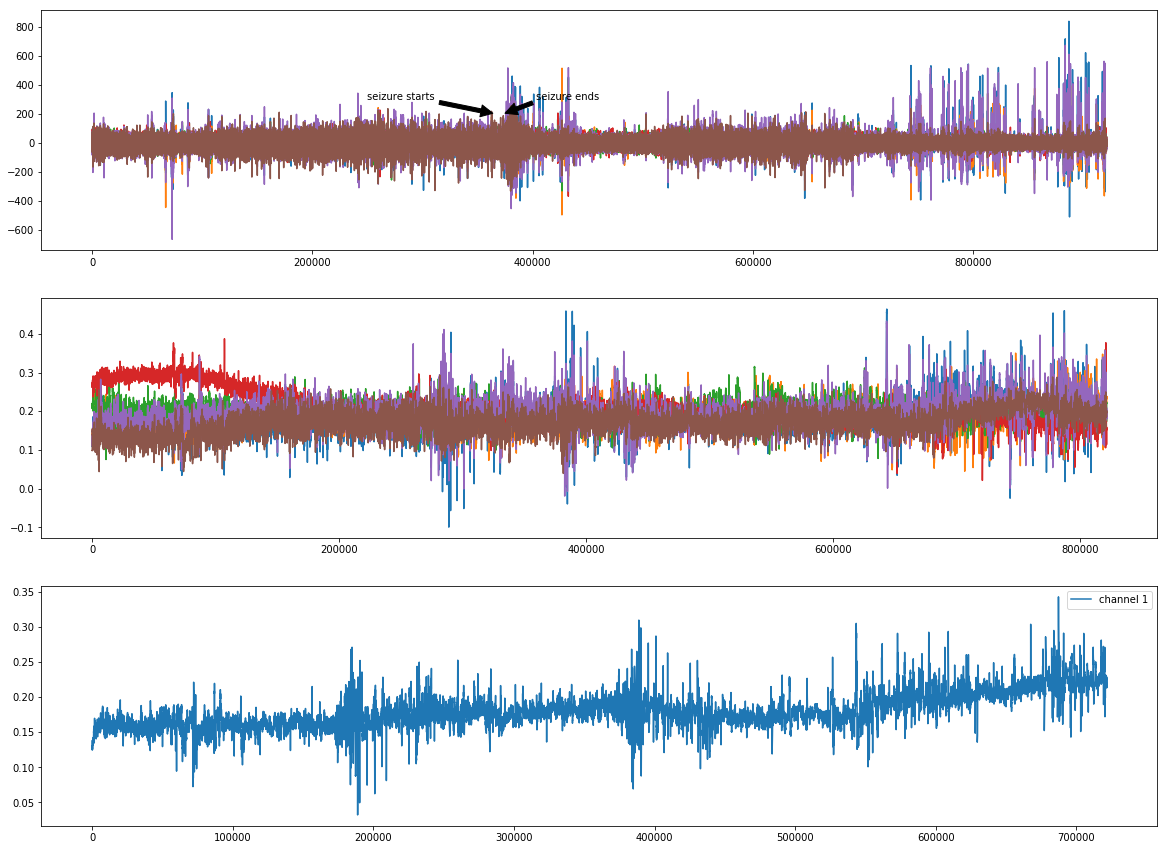

In [18]:
fig, ax = plt.subplots(3,1, figsize=(20,15))

#X dimension is the ECG channel

ax[0].plot(sigbufs[0], label='channel 1')
ax[0].plot(sigbufs[1], label='channel 2')
ax[0].plot(sigbufs[2], label='channel 3')
ax[0].plot(sigbufs[3], label='channel 4')
ax[0].plot(sigbufs[4], label='channel 5')
ax[0].plot(sigbufs[5], label='channel 6')

ax[0].annotate('seizure starts', xy=(1467*250, 200), xytext=(1467*170, 300),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax[0].annotate('seizure ends', xy=(1494*250, 200), xytext=(1494*270, 300),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax[1].plot(moving_average(sigbufs[0], n=100000), label='channel 1')
ax[1].plot(moving_average(sigbufs[1], n=100000), label='channel 2')
ax[1].plot(moving_average(sigbufs[2], n=100000), label='channel 3')
ax[1].plot(moving_average(sigbufs[3], n=100000), label='channel 4')
ax[1].plot(moving_average(sigbufs[4], n=100000), label='channel 5')
ax[1].plot(moving_average(sigbufs[5], n=100000), label='channel 6')

ax[2].plot(moving_average(sigbufs[0], n=200000), label='channel 1')

plt.legend()

## 5. Plotting Channel 5 and Rolling Averages

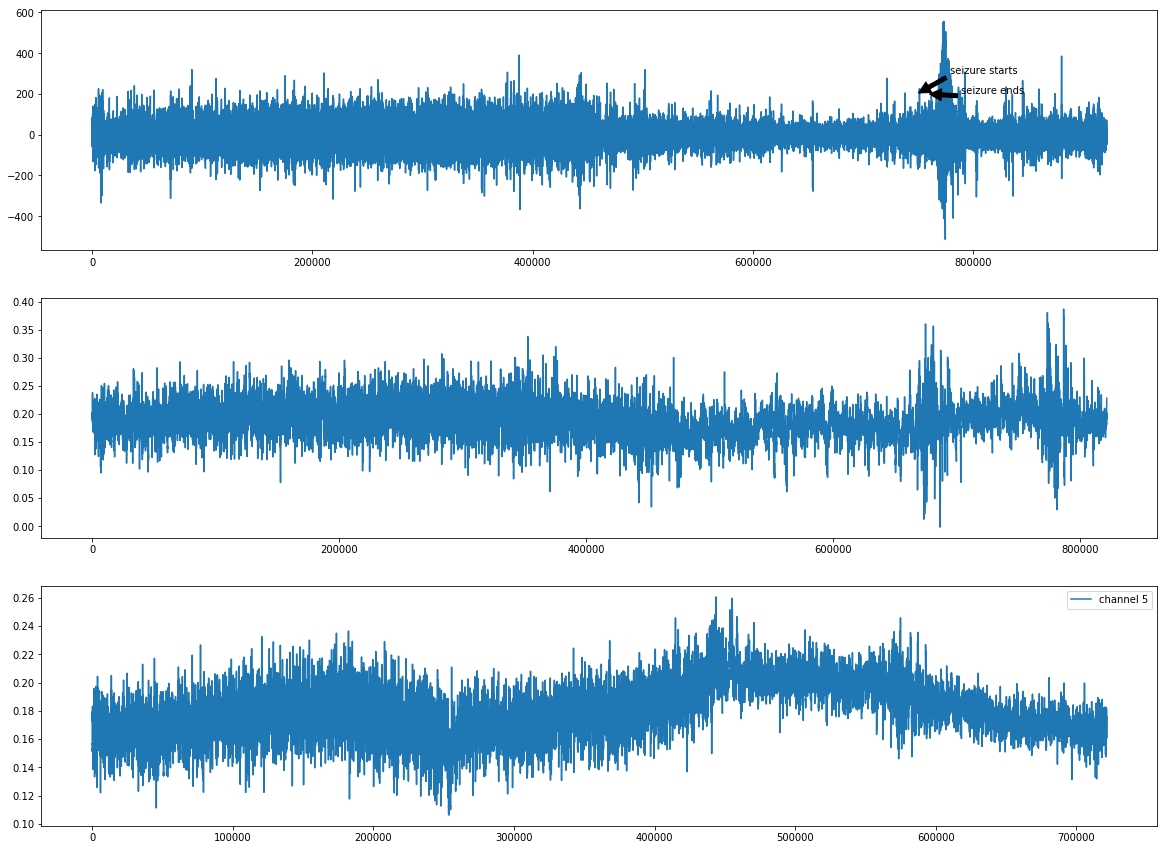

In [34]:
fig, ax = plt.subplots(3,1, figsize=(20,15))

#X dimension is the ECG channel

ax[0].plot(sigbufs[4], label='channel 5')

ax[0].annotate('seizure starts', xy=(2996*250, 200), xytext=(2996*260, 300),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax[0].annotate('seizure ends', xy=(3036*250, 200), xytext=(3036*260, 200),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax[1].plot(moving_average(sigbufs[4], n=100000), label='channel 5')

ax[2].plot(moving_average(sigbufs[5], n=200000), label='channel 5')

plt.legend()

## Filtering

As seen <a href='http://blog.kaggle.com/2017/01/10/seizure-prediction-competition-3rd-place-winners-interview-gareth-jones/'>here</a>.

## Low Pass Filter

In [31]:
fc = 0.002
b = 0.0001
N = int(np.ceil((4 / b)))
if not N % 2: N += 1
n = np.arange(N)
 
sinc_func = np.sinc(2 * fc * (n - (N - 1) / 2.))
window = 0.42 - 0.5 * np.cos(2 * np.pi * n / (N - 1)) + 0.08 * np.cos(4 * np.pi * n / (N - 1))
sinc_func = sinc_func * window
sinc_func = sinc_func / np.sum(sinc_func)

new_signal = np.convolve(sigbufs[0], sinc_func)

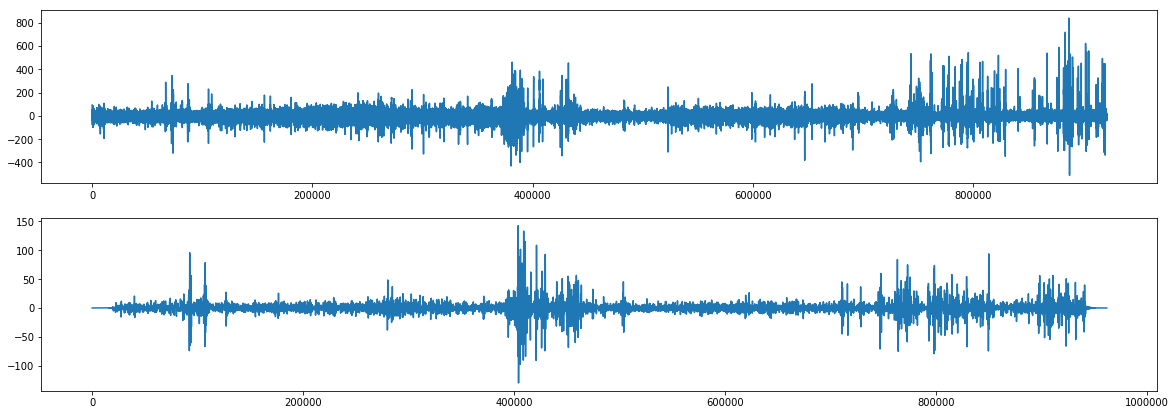

In [32]:
fig, ax = plt.subplots(2,1, figsize=(20,7))

ax[0].plot(sigbufs[0])
ax[1].plot(new_signal)

## Average Filtering

Reference: <a href='https://www.researchgate.net/publication/321944184_Epileptic_Seizures_Prediction_Using_Machine_Learning_Methods'>Epileptic Seizures Prediction Using Machine Learning Methods</a>

In [3]:
import numpy as np

avg_sig = [np.average(channels) for channels in sigbufs in range()]

In [18]:
matrix = np.matrix(sigbufs)

In [105]:
avg_freq = np.empty(matrix.shape[1])

In [ ]:
for i in range(0,matrix.shape[1]):
    print(i)
    avg_freq[i] = ([np.mean(signals) for signals in matrix[:, [i]]][0])

Text(403380, 300, 'seizure ends')

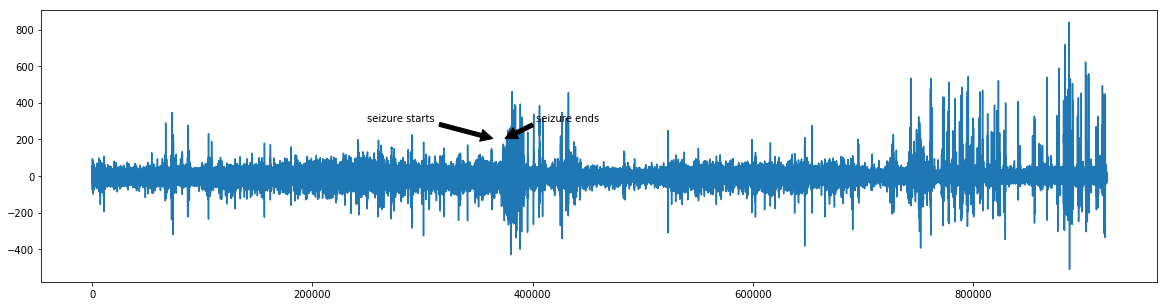

In [111]:
plt.figure(figsize=(20,5))

plt.plot(avg_freq)

plt.annotate('seizure starts', xy=(1467*250, 200), xytext=(1467*170, 300),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('seizure ends', xy=(1494*250, 200), xytext=(1494*270, 300),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

## Other Transformations (TODO)

References

* <a href='https://www.kaggle.com/treina/feature-extractor-matlab2python-translated'>Feature Extraction 1</a>

* <a href='https://www.kaggle.com/c/seizure-prediction/discussion/11024'>Feature Extraction 2</a>

* <a href='https://www.kaggle.com/c/seizure-detection/discussion/10079'>Feature Extraction 3</a>


* Log Transform

* 15 seconds windows

    * Rolling Average
    * Rolling Standard Deviation
    * FFT
   

In [129]:
import pandas as pd

series_arr = []

for i in range(0,23):
    series_arr.append(pd.Series(sigbufs[i]))

## Log Transform

/Users/rafael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


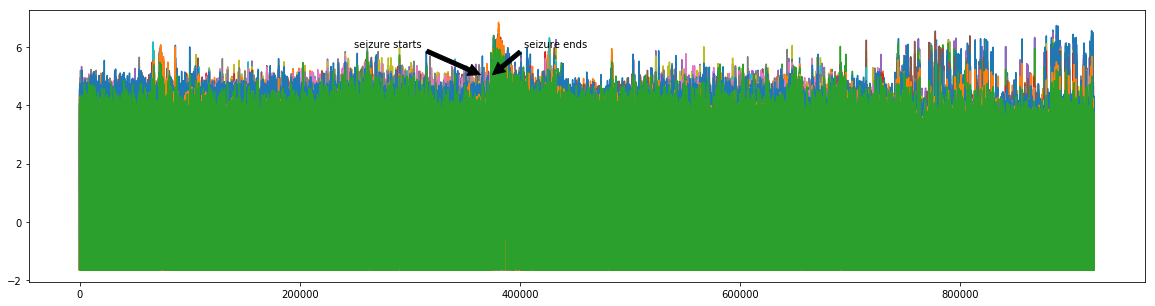

In [135]:
plt.figure(figsize=(20,5))

for i in range(0,23):
    
    plt.plot(np.log(series_arr[i]))
    
plt.annotate('seizure starts', xy=(1467*250, 5), xytext=(1467*170, 6),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('seizure ends', xy=(1494*250, 5), xytext=(1494*270, 6),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.show()

## Rolling Skewness

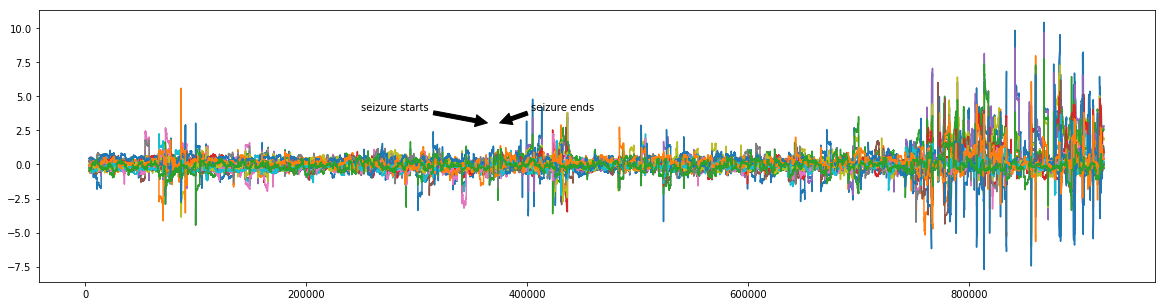

In [137]:
plt.figure(figsize=(20,5))

for i in range(0,23):
    
    plt.plot(series_arr[i].rolling(window=250*15).skew())

plt.annotate('seizure starts', xy=(1467*250, 3), xytext=(1467*170, 4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('seizure ends', xy=(1494*250, 3), xytext=(1494*270, 4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.show()

## Rolling Kurtosis

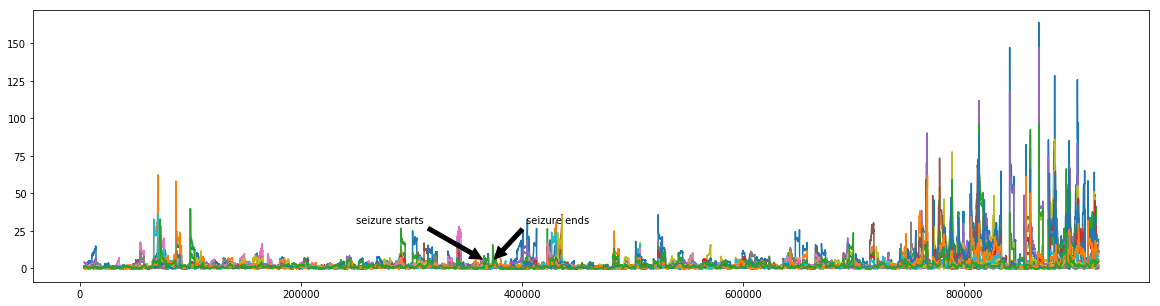

In [140]:
plt.figure(figsize=(20,5))

for i in range(0,23):
    
    plt.plot(series_arr[i].rolling(window=250*15).kurt())

plt.annotate('seizure starts', xy=(1467*250, 5), xytext=(1467*170, 30),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('seizure ends', xy=(1494*250, 5), xytext=(1494*270, 30),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.show()

## Rolling Mean

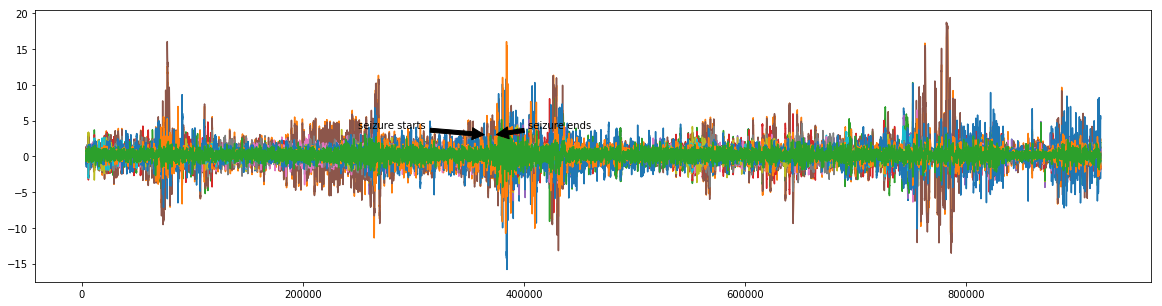

In [131]:
plt.figure(figsize=(20,5))

for i in range(0,23):
    
    plt.plot(series_arr[i].rolling(window=250*15).mean())

plt.annotate('seizure starts', xy=(1467*250, 3), xytext=(1467*170, 4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('seizure ends', xy=(1494*250, 3), xytext=(1494*270, 4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.show()

## Rolling STD

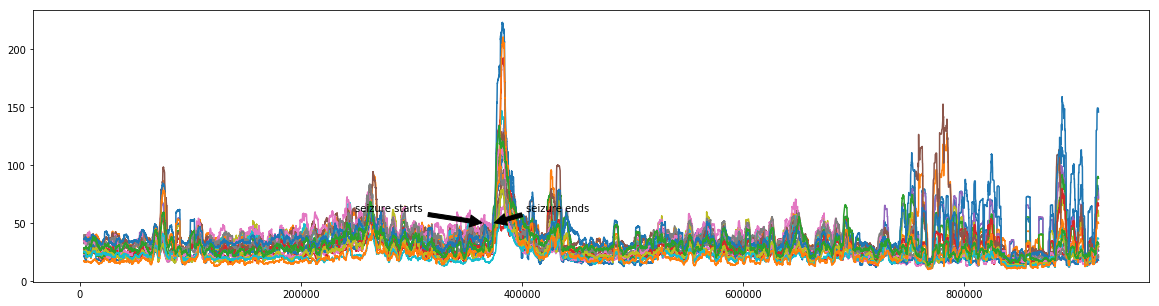

In [133]:
plt.figure(figsize=(20,5))

for i in range(0,23):
    
    plt.plot(series_arr[i].rolling(window=250*15).std())

plt.annotate('seizure starts', xy=(1467*250, 50), xytext=(1467*170, 60),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.annotate('seizure ends', xy=(1494*250, 50), xytext=(1494*270, 60),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.show()

## Apache Spark (TODO)

Reference: <a href='https://www.researchgate.net/publication/301789196_Parallel_Real_Time_Seizure_Detection_in_Large_EEG_Data/'>Parallel Real Time Seizure Detection in Large EEG Data</a>